Tutorial link: https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

In [1]:
# import the necessary packages
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16
import numpy as np
import cv2


In [5]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:

os.chdir("gdrive/MyDrive//Image_classification_2")

In [10]:
image_path = 'images/bmw.png'
orig = cv2.imread(image_path)

In [11]:
# load the input image using the Keras helper utility while ensuring
# that the image is resized to 224x224 pxiels, the required input
# dimensions for the network -- then convert the PIL image to a
# NumPy array
print(" loading and preprocessing image...")
image = image_utils.load_img(image_path, target_size=(224, 224))
image = image_utils.img_to_array(image)

 loading and preprocessing image...


In [12]:
# our image is now represented by a NumPy array of shape (224, 224, 3),
# assuming TensorFlow "channels last" ordering of course, but we need
# to expand the dimensions to be (1, 3, 224, 224) so we can pass it
# through the network -- we'll also preprocess the image by subtracting
# the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [15]:
# load the VGG16 network pre-trained on the ImageNet dataset
print("[INFO] loading network...")
model = VGG16(weights="imagenet")
# classify the image
print("[INFO] classifying image...")
preds = model.predict(image)
P = decode_predictions(preds)
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))


[INFO] loading network...
[INFO] classifying image...
1. convertible: 98.09%
2. sports_car: 0.63%
3. car_wheel: 0.43%
4. amphibian: 0.19%
5. beach_wagon: 0.18%


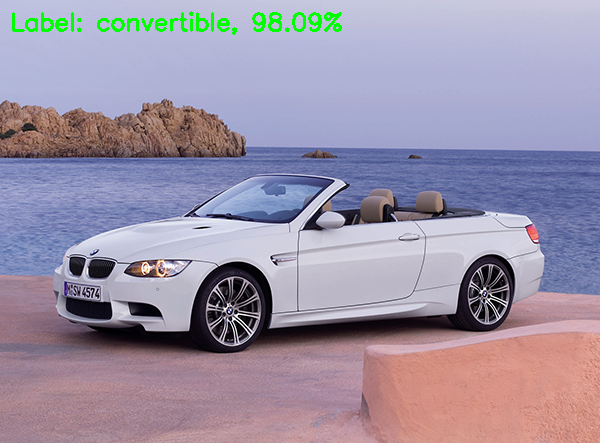

-1

In [18]:
from google.colab.patches import cv2_imshow

# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2_imshow( orig)
cv2.waitKey(0)